In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,53035940100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,KNDC3DLC3N,King,Seattle,WA,98118,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37,209298442,POINT (-122.28339 47.549285),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033010200
49996,7SAYGDEEXN,King,Issaquah,WA,98029,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5,220415555,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032221
49997,KNDCC3LG4N,King,Seattle,WA,98125,2022,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46,205703410,POINT (-122.296385 47.71558),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000202
49998,JTJHKCFZ1R,King,Bellevue,WA,98006,2024,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,41,259163628,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025007


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         50000 non-null  object
 1   County                                             50000 non-null  object
 2   City                                               50000 non-null  object
 3   State                                              50000 non-null  object
 4   Postal Code                                        50000 non-null  int64 
 5   Model Year                                         50000 non-null  int64 
 6   Make                                               50000 non-null  object
 7   Model                                              50000 non-null  object
 8   Electric Vehicle Type                              50000 non-null  object
 9   Clean Alternative

In [4]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

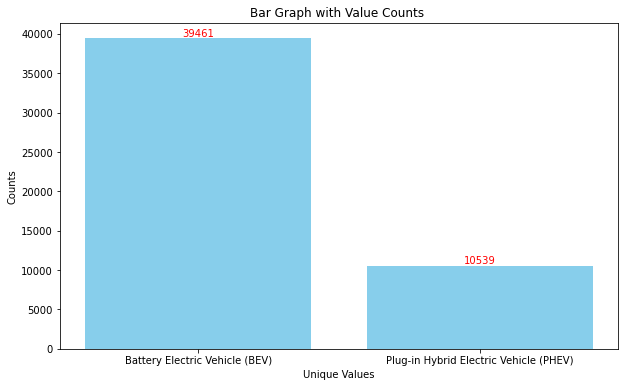

In [7]:
#lets count the number of vehicle type
electric_vehicle_type = df['Electric Vehicle Type'].value_counts()

# Setting the figure size
plt.figure(figsize=(10, 6))

#lets plot bar graph to show the results
bars = plt.bar(electric_vehicle_type.index, electric_vehicle_type.values,color='skyblue')

#lets add values on top of each bar graph
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center',color='red' ,va='bottom')
    

# Adding labels and title
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Bar Graph with Value Counts ')
plt.show()

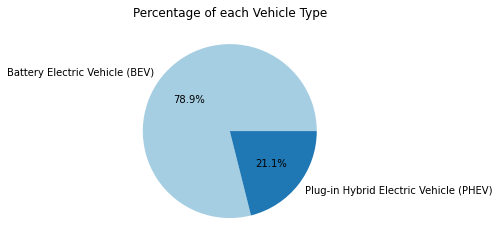

In [8]:
plt.pie(electric_vehicle_type.values, labels=electric_vehicle_type.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of each Vehicle Type')
plt.show()

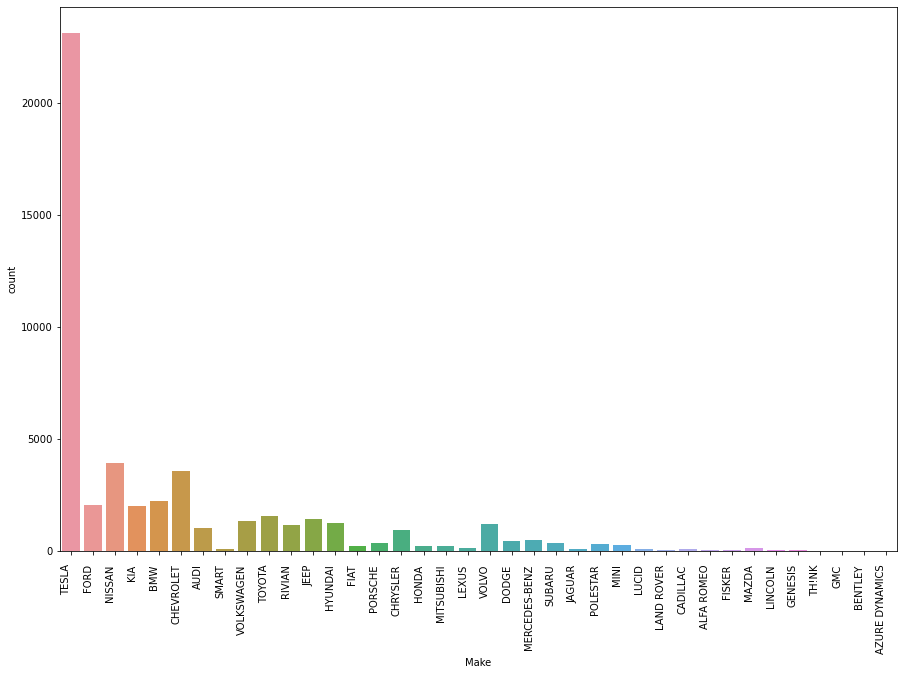

In [27]:
sns.countplot(data=df, x='Make')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 10)  # Setting the figure size
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[1], rotation=90, fontsize=10, ha='right')
plt.gca().tick_params(axis='x', pad=10)  
plt.show()

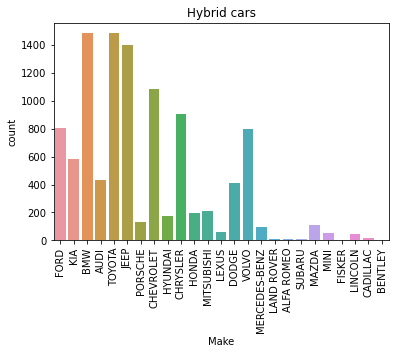

In [10]:
sns.countplot(data=df.loc[(df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)')],x='Make')
plt.title('Hybrid cars')
plt.xticks(rotation=90)
plt.show()

In [32]:
df.tail(
)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
49995,KNDC3DLC3N,King,Seattle,WA,98118,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37,209298442,POINT (-122.28339 47.549285),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033010200
49996,7SAYGDEEXN,King,Issaquah,WA,98029,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5,220415555,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032221
49997,KNDCC3LG4N,King,Seattle,WA,98125,2022,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46,205703410,POINT (-122.296385 47.71558),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000202
49998,JTJHKCFZ1R,King,Bellevue,WA,98006,2024,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,41,259163628,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025007
49999,JTDKARFP8L,Clark,Vancouver,WA,98682,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,17,168387299,POINT (-122.5146473 45.67862),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040604


In [33]:
highest_car = (
    df.groupby(['County','City'])
    .size()
    .reset_index(name='Count')
    .sort_values(['County', 'Count'], ascending=[False, False])
)
highest_car

,County,City,Count
155,Yakima,Yakima,205
149,Yakima,Selah,38
150,Yakima,Sunnyside,15
143,Yakima,Grandview,10
146,Yakima,Moxee,8
...,...,...,...
5,Clallam,Sequim,21
3,Clallam,Forks,1
1,Chelan,Chelan,2
2,Chelan,Wenatchee,2
